In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
import seaborn as sb
sb.heatmap(df.isnull())

In [4]:
nan_data = df[df.isna().any(axis=1)]
nan_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [5]:
df = df.dropna()
len(df)

4909

In [6]:
df = df.drop(['id'], axis=1)

In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


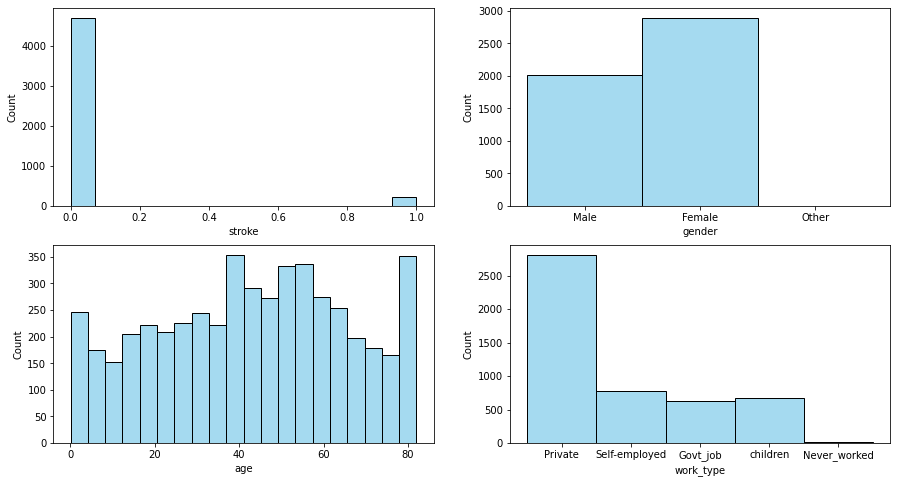

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df,x='stroke',ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='gender',ax=axes[0,1],color='skyblue')
sns.histplot(data=df,x='age',ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='work_type',ax=axes[1,1],color='skyblue')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [10]:
df['gender'] = encode.fit_transform(df['gender'].values)

df['ever_married'] = encode.fit_transform(df['ever_married'].values)
df['work_type'] = encode.fit_transform(df['work_type'].values)
df['Residence_type'] = encode.fit_transform(df['Residence_type'].values)
df['smoking_status'] = encode.fit_transform(df['smoking_status'].values)

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [12]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']
print(X.shape)
print(y.shape)

(4909, 10)
(4909,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape)

(3436, 10)


In [14]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

BAGGING

In [15]:
# Bagging
dt = DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
bc.fit(X_train, y_train)
y_predbc = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_predbc)
print('Akurasi dengan Metode Bagging:') 
bc.score(X_test,y_test)

Akurasi dengan Metode Bagging:


0.9613034623217923

RandomUnderSampler

In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X_train, y_train)

In [25]:
bc.fit(x_rus, y_rus)
y_predbc = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_predbc)
print('Akurasi dengan menerapkan Random UnderSampler:') 
bc.score(X_test,y_test)

Akurasi dengan menerapkan Random UnderSampler:


0.6259334691106585

RandomOverSampler

In [18]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X_train, y_train)

In [26]:
bc.fit(x_ros, y_ros)
y_predbc = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_predbc)
print('Akurasi dengan menerapkan Random OverSampler:') 
bc.score(X_test,y_test)

Akurasi dengan menerapkan Random OverSampler:


0.9531568228105907

SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [21]:
bc.fit(x_smote, y_smote)
y_predbc = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_predbc)
print('Akurasi dengan menerapkan SMOTE:') 
bc.score(X_test,y_test)

Akurasi dengan menerapkan SMOTE:


0.90020366598778

NearMiss

In [22]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)

In [23]:
bc.fit(X_train_nearmiss, y_train_nearmiss)
y_predbc = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_predbc)
print('Akurasi dengan menerapkan NearMiss:') 
bc.score(X_test,y_test)

Akurasi dengan menerapkan NearMiss:


0.5505770536320435

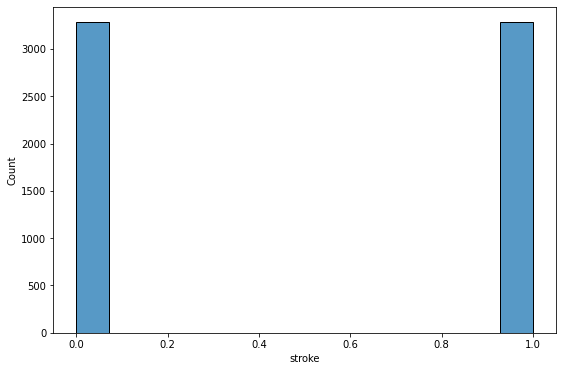

In [24]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_ros)
plt.show()